In [33]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
%matplotlib inline
from matplotlib import pyplot as plt
data = pd.read_csv("C:\\Users\\李乔乔\\Desktop\\数据分析大赛\\数据\\zuihou.csv",engine='python')

data.head(7)








,user_id,date,month,time,first_order_price,age_month,city_num,platform_num,model_num,app_num,...,add_group,camp_num,learn_num,finish_num,study_num,coupon,course_order_num,province,cityrank,result
0,2000001561546180,2019/1/12,J,19:50,0.00,42,其他城市,13.557,11.215400,1,...,1,1,2,1,0,0,0,其他省份,其他,0
1,2000001561647880,2019/5/3,M,8:51,0.01,67,赣州,13.557,5.673400,1,...,1,2,1,0,0,0,0,江西,三线,0
2,2000001563253700,2019/4/30,A,22:58,0.00,77,北京,13.557,13.532800,1,...,0,0,0,0,0,0,0,北京,一线,0
3,2000001564052760,2018/12/9,D,10:11,0.00,80,沈阳,13.557,18.444700,1,...,1,1,0,0,0,0,0,辽宁,一线,0
4,2000001564053970,2019/1/15,J,20:14,0.00,55,南京,13.557,20.376499,1,...,1,1,4,4,0,2,0,江苏,一线,0
5,2000001568347310,2018/12/8,D,22:31,0.00,29,南昌,13.557,10.468000,1,...,1,1,0,0,0,0,0,江西,二线,0
6,2000001568445700,2019/3/18,M,13:20,0.00,115,其他城市,13.557,11.192400,1,...,1,0,0,0,0,0,0,其他省份,其他,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

# 20%用于测试集，80%用于训练集
train,test= train_test_split(data,test_size=0.20,random_state=10)



from sklearn import preprocessing
# 初始化编码器
le = preprocessing.LabelEncoder()
for col in train.columns:
    train[col] = le.fit_transform(train[col])
train.head()

from sklearn import preprocessing
# 初始化编码器
le = preprocessing.LabelEncoder()
for col in test.columns:
    test[col] = le.fit_transform(test[col])
test.head()



<ipython-input-34-ab0e3eb7e9db>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = le.fit_transform(train[col])
<ipython-input-34-ab0e3eb7e9db>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = le.fit_transform(test[col])


,user_id,date,month,time,first_order_price,age_month,city_num,platform_num,model_num,app_num,...,add_group,camp_num,learn_num,finish_num,study_num,coupon,course_order_num,province,cityrank,result
71504,23619,165,0,63,0,46,72,0,488,0,...,1,2,1,0,0,0,0,3,3,0
98716,12375,49,3,1328,0,63,45,1,429,0,...,1,1,2,2,0,2,0,2,4,0
133317,3186,7,5,263,3,46,45,0,320,0,...,1,3,7,0,0,1,0,2,4,0
130343,7072,17,1,788,0,59,45,1,265,0,...,1,3,8,7,0,0,0,2,4,0
18150,9896,32,1,524,0,84,189,0,382,0,...,1,1,0,0,0,0,0,27,5,0


In [35]:
def get_y_train():
    y_train = np.array(train['result'])
   
    return y_train
 
def get_y_test():
    y_test = np.array(test['result'])
 
    return y_test
 
def get_X_train():
   # oh_data = pd.get_dummies(train) #对非数值数据进行ont-hot编码
   #y_train = np.where(y_train == '1', 1, 0) #将预测值转换成01
    columns_size = train.columns.size
    X_train = train.iloc[:,1:columns_size-2] #取特征
    X_train = preprocessing.scale(X_train) #归一化
    return X_train
 
def get_X_test():
    #oh_test = pd.get_dummies(test) #对非数值数据进行ont-hot编码
    # y_train = np.where(y_test == '1', 1, 0) #将预测值转换成01
    columns_size = test.columns.size
    X_test = test.iloc[:,1:columns_size-2] #取特征
    X_test= preprocessing.scale(X_test) #归一化
    return X_test
X_test = get_X_test()
X_train = get_X_train()
y_test = get_y_test()
y_train = get_y_train()

In [37]:

print('X_test.shape:'+str(X_test.shape))
print('X_train.shape:'+str(X_train.shape))

X_test.shape:(27032, 50)
X_train.shape:(108127, 50)


In [46]:
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential
from keras import optimizers
from sklearn import metrics
 
 
model = Sequential()
model.add(Dense(50, input_dim = 50, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = optimizers.Adam(lr = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

history = model.fit(X_train, y_train,epochs = 20, batch_size = 1500,  validation_data = (X_test, y_test))

Epoch 1/20
73/73 [==============================] - 3s 15ms/step - loss: 0.2425 - accuracy: 0.9481 - val_loss: 0.0825 - val_accuracy: 0.9722
Epoch 2/20
73/73 [==============================] - 0s 7ms/step - loss: 0.0832 - accuracy: 0.9723 - val_loss: 0.0613 - val_accuracy: 0.9785
Epoch 3/20
73/73 [==============================] - 0s 7ms/step - loss: 0.0702 - accuracy: 0.9763 - val_loss: 0.0541 - val_accuracy: 0.9803
Epoch 4/20
73/73 [==============================] - 0s 7ms/step - loss: 0.0617 - accuracy: 0.9779 - val_loss: 0.0504 - val_accuracy: 0.9811
Epoch 5/20
73/73 [==============================] - 0s 7ms/step - loss: 0.0554 - accuracy: 0.9803 - val_loss: 0.0482 - val_accuracy: 0.9822
Epoch 6/20
73/73 [==============================] - 1s 7ms/step - loss: 0.0526 - accuracy: 0.9816 - val_loss: 0.0457 - val_accuracy: 0.9828
Epoch 7/20
73/73 [==============================] - 0s 7ms/step - loss: 0.0497 - accuracy: 0.9819 - val_loss: 0.0451 - val_accuracy: 0.9834
Epoch 8/20
73/73 [=

In [42]:
y_pred = model.predict_classes(X_test, batch_size = 20, verbose = 1)
print(y_pred)
target_names = ['1', '0']

print(metrics.classification_report(y_test, y_pred,
    target_names = target_names))


history_dict = history.history
loss, accuracy = model.evaluate(X_test, y_test)

print('test loss: ', loss)
print('test accuracy: ', accuracy)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
print(history_dict)
print(pd.DataFrame(history_dict))



C:\shazi\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


1352/1352 [==============================] - 2s 956us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
              precision    recall  f1-score   support

           1       0.99      1.00      0.99     26087
           0       0.88      0.70      0.78       945

    accuracy                           0.99     27032
   macro avg       0.94      0.85      0.89     27032
weighted avg       0.99      0.99      0.99     27032

845/845 [==============================] - 1s 967us/step - loss: 0.0371 - accuracy: 0.9863
test loss:  0.037121448665857315
test accuracy:  0.9863495230674744
{'loss': [0.17554756999015808, 0.07266560941934586, 0.061749111860990524, 0.055955663323402405, 0.0515621155500412, 0.04888548329472542, 0.047191232442855835, 0.046117186546325684, 0.044370368123054504, 0.043085914105176926, 0.04180535301566124, 0.040814828127622604, 0.03980817273259163, 0.03980385139584541, 0.03917018696665764, 0.03829442337155342, 0.03761309012770653, 0.03687366470694542, 0.03675001859664917, 0.03

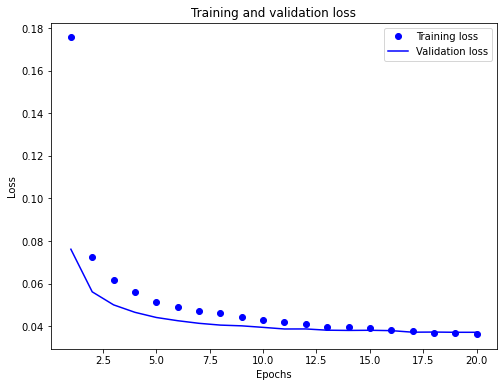

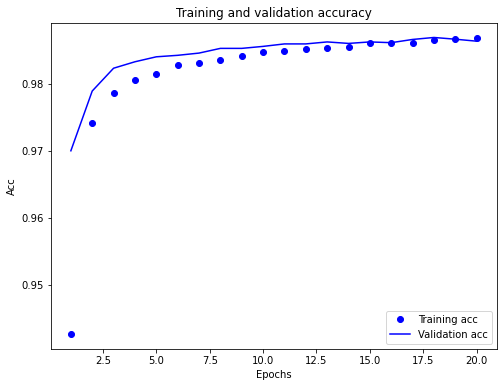

In [43]:
#画图
plt.figure(figsize=(8,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.figure(figsize=(8,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.plot(epochs, acc_values, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


In [47]:
#导出
df1= pd.DataFrame(y_pred,y_test)
df1
df1.to_csv("out_result3.csv")
df5= pd.DataFrame(test)
df5
df5.to_csv("out_test3.csv")
df6= pd.DataFrame(train)
df6
df6.to_csv("out_train3.csv")
df6= pd.DataFrame(history_dict)
df6
df6.to_csv("history_dict3.csv")


>>>特征权重值
 [2.44627416e-02 3.52673704e-03 4.64713106e-02 6.06196384e-03
 1.44779292e-02 1.14689227e-02 4.11452311e-03 1.44945876e-02
 0.00000000e+00 4.65172918e-03 1.20313899e-02 2.55244338e-03
 5.21984132e-03 2.28658938e-03 2.52541183e-03 2.46928597e-03
 1.38786285e-03 2.86979506e-03 2.32249436e-02 0.00000000e+00
 3.36031077e-03 3.06072448e-03 6.03581377e-03 5.34165362e-03
 8.34071074e-03 1.16751335e-02 4.63886536e-03 7.81397274e-03
 5.86102045e-03 4.43371888e-03 2.69965088e-03 3.36524183e-03
 7.89044888e-03 3.15729502e-03 1.47463844e-02 8.38430224e-02
 2.81390428e-01 1.46742636e-02 2.09018103e-03 1.42339705e-02
 3.27814668e-03 2.45249179e-04 3.42739535e-04 1.33469992e-02
 1.04765080e-02 7.17145593e-03 7.03324400e-03 2.37263073e-01
 4.04542750e-02 7.43749119e-03]

>>>索引降序排列
 [36 47 35  2 48  0 18 34 37  7  4 39 43 10 25  5 44 24 32 27 49 45 46  3
 22 28 23 12  9 26 29  6  1 31 20 40 33 21 17 30 11 14 15 13 38 16 42 41
  8 19]

>>>特征名
 ['distance_day', 'coupon', 'login_diff_time', 'time

Text(0.5, 1.0, 'Feature Weights')

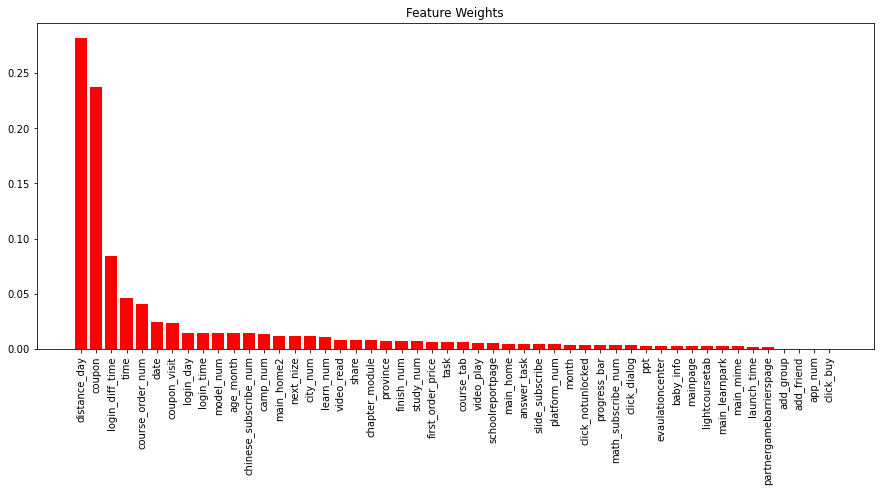

In [44]:
#无论是分类还是回归问题都可以使用决策树算法来获取特征重要性权重值。
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()  # 初始化
dtc.fit(X_train, y_train)  # 训练

# 获取特征权重值
weights = dtc.feature_importances_
print('>>>特征权重值\n', weights)

# 索引降序排列
sort_index = np.argsort(weights)[::-1] 
# 对应的特征名
name = [train.iloc[:, 1:].columns[i] for i in sort_index]
print('\n>>>索引降序排列\n', sort_index)
print('\n>>>特征名\n', name)

# 可视化
plt.figure(figsize=(15,6),facecolor='white',edgecolor='white') #设置画布颜色、画布边线颜色
plt.bar(x=name, height=weights[sort_index], color='r')
_ = plt.xticks(rotation=90)
plt.title('Feature Weights')
#下图可以看出每个特征都有作用，都不可舍去

In [49]:
train1,test1= train_test_split(data,test_size=0.20,random_state=10)
df5= pd.DataFrame(test1)
df5
df5.to_csv("out_test4.csv")
df6= pd.DataFrame(train1)
df6
df6.to_csv("out_train4.csv")

In [52]:

df8= pd.DataFrame(name)
df8
df8.to_csv("out_weight1.csv")

In [53]:
df1

,0
0,0
0,0
0,0
0,0
0,0
...,...
0,0
0,0
0,0
0,0
